In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Cpx-Opx_H2O')
myOpxs1=out['Opxs']
myCpxs1=out['Cpxs']
myLiqs1=out['Liqs']
Opx_Cpx=out['my_input']

notinLEPR= Opx_Cpx['Citation_x'].str.contains('notinLEPR')
notinKeith=(Opx_Cpx['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Cpx['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Opx_Cpx['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_opx_eq_tests(cpx_comps=myCpxs1, opx_comps=myOpxs1)
Quad_Opx=eq_tests['Ca_Opx_cat_6ox']/(eq_tests['Ca_Opx_cat_6ox']+eq_tests['Mg_Opx_cat_6ox']+eq_tests['Fet_Opx_cat_6ox'])
Quad_Cpx=eq_tests['Ca_Cpx_cat_6ox']/(eq_tests['Ca_Cpx_cat_6ox']+eq_tests['Mg_Cpx_cat_6ox']+eq_tests['Fet_Cpx_cat_6ox'])


C:\Users\penny\AppData\Local\Temp\ipykernel_8856\28943130.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Opx_Cpx['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Cpx['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


# Equilibrium test plots
- Equilibrium tests weird Kd, because Cpx_Lq KD is a function of T, nd Opx-liq Kd is a function of Xsi, so both influence Cpx-Opx Kd. 

In [4]:
myLiquids_Fe3_Kress=pt.convert_fo2_to_fe_partition(liq_comps=myLiqs1, T_K=Opx_Cpx['T_K_x'], 
                                          P_kbar=Opx_Cpx['P_kbar_x'], fo2=10**(Opx_Cpx['logfo2']), model="Kress1991", 
                                                   renorm=True)

myLiquids_Fe3_Kress['Fe3Fet_Liq'].loc[Opx_Cpx['logfo2']==0]=0


KdMeas_Cpx=pt.calculate_clinopyroxene_liquid_components(cpx_comps=myCpxs1, liq_comps=myLiqs1)
KdMeas_Opx=pt.calculate_orthopyroxene_liquid_components(opx_comps=myOpxs1, liq_comps=myLiqs1)
Kd_FeMg_Cpx_Liq=np.exp(-0.107 - 1719 / Opx_Cpx['T_K_x'])
IdealKd=Kd_FeMg_Cpx_Liq/KdMeas_Opx['Ideal_Kd']

#Eq_Mask=abs(eq_tests['Kd_Fe_Mg_Cpx_Opx']-IdealKd)<0.3
Eq_Mask=Quad_Opx<0.06
xT=Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]
x=Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask]

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Sensitivity to Cr calculations

In [6]:
Filt=[10, 20, 30, 40, 50, 60]
delta_Cr_lin=np.linspace(0, 0.6, 20)
CrSens_eq36=np.empty([len(delta_Cr_lin), len(Filt)], dtype=float)
CrSens_eq3638=np.empty([len(delta_Cr_lin), len(Filt)], dtype=float)

CrSens_eq3639=np.empty([len(delta_Cr_lin), len(Filt)], dtype=float)
CrSens_eq3739=np.empty([len(delta_Cr_lin), len(Filt)], dtype=float)
CrSens_eq3738=np.empty([len(delta_Cr_lin), len(Filt)], dtype=float)

Cpx_comps=myCpxs1.loc[Filt]
Opx_comps=myOpxs1.loc[Filt]
for i in range(0, len(delta_Cr_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
        Opx_comps['Cr2O3_Opx']=delta_Cr_lin[i]

        
        CrSens_eq3638[i]=pt.calculate_cpx_opx_press_temp(cpx_comps=Cpx_comps,
    opx_comps=Opx_comps, equationP="P_Put2008_eq38", equationT="T_Put2008_eq36").P_kbar_calc
        CrSens_eq3738[i]=pt.calculate_cpx_opx_press_temp(cpx_comps=Cpx_comps,
    opx_comps=Opx_comps, equationP="P_Put2008_eq38", equationT="T_Put2008_eq37").P_kbar_calc
        CrSens_eq3739[i]=pt.calculate_cpx_opx_press_temp(cpx_comps=Cpx_comps,
    opx_comps=Opx_comps, equationP="P_Put2008_eq39", equationT="T_Put2008_eq37").P_kbar_calc
        CrSens_eq3639[i]=pt.calculate_cpx_opx_press_temp(cpx_comps=Cpx_comps,
    opx_comps=Opx_comps, equationP="P_Put2008_eq39", equationT="T_Put2008_eq36").P_kbar_calc

        
        


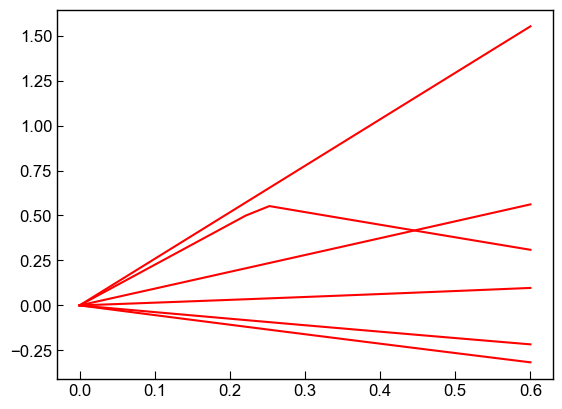

In [8]:
plt.plot(delta_Cr_lin, CrSens_eq3638-CrSens_eq3638[0], '-r')

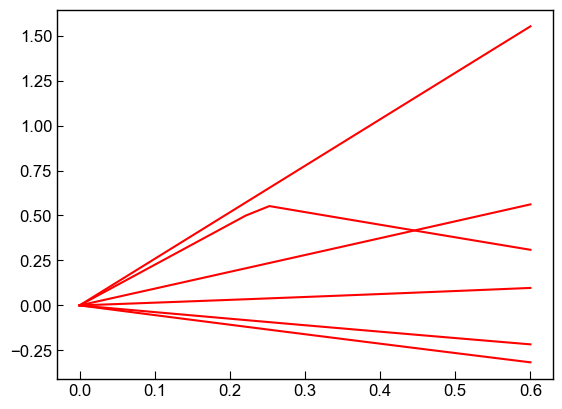

In [9]:
plt.plot(delta_Cr_lin, CrSens_eq3738-CrSens_eq3738[0], '-r')

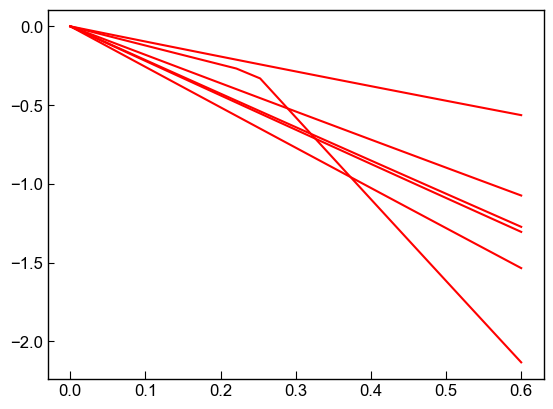

In [10]:
plt.plot(delta_Cr_lin, CrSens_eq3739-CrSens_eq3739[0], '-r')

## Perform calculations, then filter by equilibrium etc. 

In [8]:
# Equation 36 is P-dependent
# Equation 37 is P dependent

# Equation 38 is T independent, for Mg#>0.68
# Equatoin 39 is T dependent

In [10]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    # Wood and 39
    Out_39_Wood1973=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Wood1973")
    y_39_Wood1973=Out_39_Wood1973.loc[Press_new&(Eq_Mask)]
    Eq_39_Wood1973=pt.calculate_R2(x, y_39_Wood1973['P_kbar_calc']) # 39 Fixed T
    TEq_39_Wood1973=pt.calculate_R2(xT, y_39_Wood1973['T_K_calc']) # 39 Fixed T
    
    Out_39_Wells1977=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Wells1977")
    y_39_Wells1977=Out_39_Wells1977.loc[Press_new&(Eq_Mask)]
    Eq_39_Wells1977=pt.calculate_R2(x, y_39_Wells1977['P_kbar_calc']) # 39 Fixed T
    TEq_39_Wells1977=pt.calculate_R2(xT, y_39_Wells1977['T_K_calc']) # 39 Fixed T    
    
    # Equation 36 and equation 39 (for Mg#>0.68)
   
    Out_39_36=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, 
                        equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", eq_tests=True)
    y_39_36=Out_39_36.loc[Press_new&(Eq_Mask)]
    Eq_39_36=pt.calculate_R2(x, y_39_36['P_kbar_calc']) # 39 Fixed T
    TEq_39_36=pt.calculate_R2(xT, y_39_36['T_K_calc']) # 39 Fixed T
    
    # Equation 37 and equation 39 (for Mg#<0.68)
    
    Out_39_37=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Put2008_eq37")
    y_39_37=Out_39_37.loc[Press_new&(Eq_Mask)]
    Eq_39_37=pt.calculate_R2(x, y_39_37['P_kbar_calc']) # 39 Fixed T
    TEq_39_37=pt.calculate_R2(xT, y_39_37['T_K_calc']) # 39 Fixed T 
    
    
    Out_39_Brey1990=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39", equationT="T_Brey1990")
    y_39_Brey1990=Out_39_Brey1990.loc[Press_new&(Eq_Mask)]
    Eq_39_Brey1990=pt.calculate_R2(x, y_39_Brey1990['P_kbar_calc']) # 39 Fixed T
    TEq_39_Brey1990=pt.calculate_R2(xT, y_39_Brey1990['T_K_calc']) # 39 Fixed T
    
    
    Out_38_36=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Put2008_eq36")
    y_38_36=Out_38_36.loc[Press_new&(Eq_Mask)]
    Eq_38_36=pt.calculate_R2(x, y_38_36['P_kbar_calc']) # 38 Fixed T
    TEq_38_36=pt.calculate_R2(xT, y_38_36['T_K_calc']) # 38 Fixed T
    
    # Equation 37 and equation 38 (for Mg#<0.68)
    
    Out_38_37=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Put2008_eq37")
    y_38_37=Out_38_37.loc[Press_new&(Eq_Mask)]
    Eq_38_37=pt.calculate_R2(x, y_38_37['P_kbar_calc']) # 38 Fixed T
    TEq_38_37=pt.calculate_R2(xT, y_38_37['T_K_calc']) # 38 Fixed T 
    
    
    Out_38_Brey1990=pt.calculate_cpx_opx_press_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38", equationT="T_Brey1990")
    y_38_Brey1990=Out_38_Brey1990.loc[Press_new&(Eq_Mask)]
    Eq_38_Brey1990=pt.calculate_R2(x, y_38_Brey1990['P_kbar_calc']) # 38 Fixed T
    TEq_38_Brey1990=pt.calculate_R2(xT, y_38_Brey1990['T_K_calc']) # 38 Fixed T
    
    


Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Youve selected a T-independent function


In [11]:
Out_39_36.columns

Index(['T_K_calc', 'P_kbar_calc', 'Equation Choice (T)', 'Equation Choice (P)',
       'Delta Kd High T', 'High T Kd Eq?', 'Delta Kd Low T', 'Low T Kd Eq?',
       'SiO2_Cpx', 'TiO2_Cpx', 'Al2O3_Cpx', 'FeOt_Cpx', 'MnO_Cpx', 'MgO_Cpx',
       'CaO_Cpx', 'Na2O_Cpx', 'K2O_Cpx', 'Cr2O3_Cpx', 'Sample_ID_Cpx',
       'Si_Cpx_cat_6ox', 'Mg_Cpx_cat_6ox', 'Fet_Cpx_cat_6ox', 'Ca_Cpx_cat_6ox',
       'Al_Cpx_cat_6ox', 'Na_Cpx_cat_6ox', 'K_Cpx_cat_6ox', 'Mn_Cpx_cat_6ox',
       'Ti_Cpx_cat_6ox', 'Cr_Cpx_cat_6ox', 'oxy_renorm_factor',
       'Al_IV_cat_6ox', 'Al_VI_cat_6ox', 'En_Simple_MgFeCa_Cpx',
       'Fs_Simple_MgFeCa_Cpx', 'Wo_Simple_MgFeCa_Cpx', 'Cation_Sum_Cpx',
       'Ca_CaMgFe', 'Lindley_Fe3_Cpx', 'Lindley_Fe2_Cpx',
       'Lindley_Fe3_Cpx_prop', 'CrCaTs', 'a_cpx_En', 'Mgno_Cpx', 'Jd',
       'Jd_from 0=Na, 1=Al', 'CaTs', 'CaTi', 'DiHd_1996', 'EnFs', 'DiHd_2003',
       'Di_Cpx', 'FeIII_Wang21', 'FeII_Wang21', 'SiO2_Opx', 'TiO2_Opx',
       'Al2O3_Opx', 'FeOt_Opx', 'MnO_Opx', 'MgO_Opx', 

In [12]:
HighCpxMgno=Out_39_36['Mgno_Cpx']>0.68 # (Out_39_36['Cr2O3_Cpx']>0) &  (Out_39_36['Cr2O3_Opx']>0)

Text(0.5, 1.0, '3837')

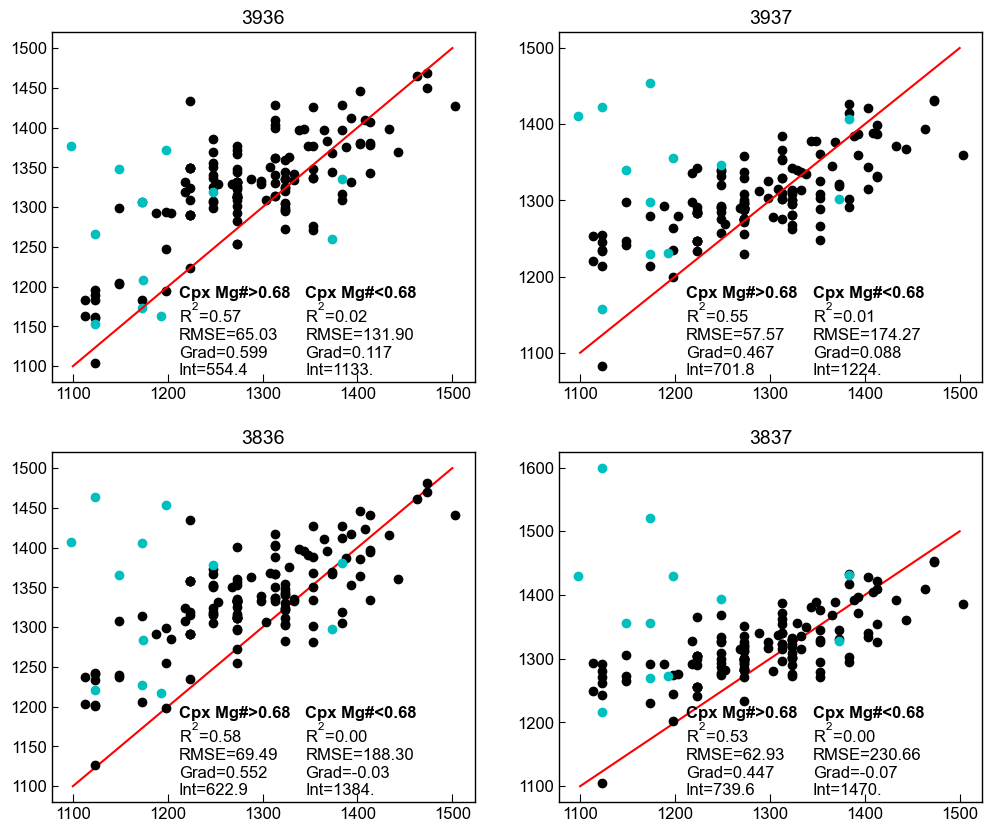

In [13]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here


ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok')

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

## Statistics for 39-36 temps
Stats_3936_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno])

ax0.annotate("Cpx Mg#>0.68", xy=(0.3, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax0.annotate("R$^{2}$="+str(Stats_3936_highMgno['R2']), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax0.annotate("RMSE="+str(Stats_3936_highMgno['RMSE']), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax0.annotate("Grad="+str(np.round(Stats_3936_highMgno['Grad'], 3))[1:6], xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax0.annotate("Int="+str(np.round(Stats_3936_highMgno['Int'], 3))[1:6], xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3936_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)])

ax0.annotate("Cpx Mg#<0.68", xy=(0.6, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax0.annotate("R$^{2}$="+str(Stats_3936_lowMgno['R2']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax0.annotate("RMSE="+str(Stats_3936_lowMgno['RMSE']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax0.annotate("Grad="+str(np.round(Stats_3936_lowMgno['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax0.annotate("Int="+str(np.round(Stats_3936_lowMgno['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

ax0.plot([1100, 1500], [1100, 1500], '-r')
ax1.plot([1100, 1500], [1100, 1500], '-r')
ax2.plot([1100, 1500], [1100, 1500], '-r')
ax3.plot([1100, 1500], [1100, 1500], '-r')

Stats_3937_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno])

ax1.annotate("Cpx Mg#>0.68", xy=(0.3, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_highMgno['R2']), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_highMgno['RMSE']), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_3937_highMgno['Grad'], 3))[1:6], xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_3937_highMgno['Int'], 3))[1:6], xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3937_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)])

ax1.annotate("Cpx Mg#<0.68", xy=(0.6, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_lowMgno['R2']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_lowMgno['RMSE']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_3937_lowMgno['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_3937_lowMgno['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok')

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

Stats_3836_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno])

ax2.annotate("Cpx Mg#>0.68", xy=(0.3, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3836_highMgno['R2']), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3836_highMgno['RMSE']), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_3836_highMgno['Grad'], 3))[1:6], xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_3836_highMgno['Int'], 3))[1:6], xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3836_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)])

ax2.annotate("Cpx Mg#<0.68", xy=(0.6, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3836_lowMgno['R2']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3836_lowMgno['RMSE']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_3836_lowMgno['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_3836_lowMgno['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax3.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok')

ax3.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

Stats_3837_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno])

ax3.annotate("Cpx Mg#>0.68", xy=(0.3, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax3.annotate("R$^{2}$="+str(Stats_3837_highMgno['R2']), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_3837_highMgno['RMSE']), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(Stats_3837_highMgno['Grad'], 3))[1:6], xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(Stats_3837_highMgno['Int'], 3))[1:6], xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3837_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)])

ax3.annotate("Cpx Mg#<0.68", xy=(0.6, 0.24),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax3.annotate("R$^{2}$="+str(Stats_3837_lowMgno['R2']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_3837_lowMgno['RMSE']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(Stats_3837_lowMgno['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(Stats_3837_lowMgno['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)
ax0.set_title('3936')
ax1.set_title('3937')
ax2.set_title('3836')
ax3.set_title('3837')


C:\Users\penny\AppData\Local\Temp\ipykernel_14192\1821952730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_tests_trim['Disc with T']= (Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]


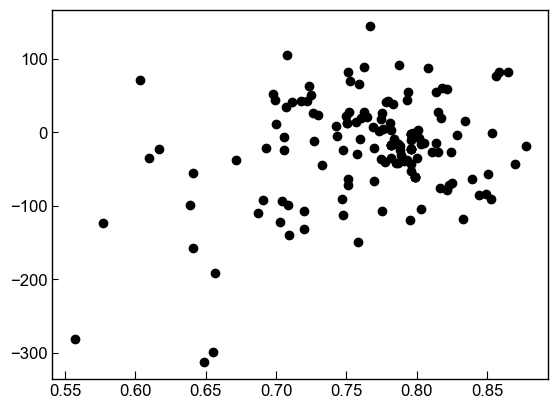

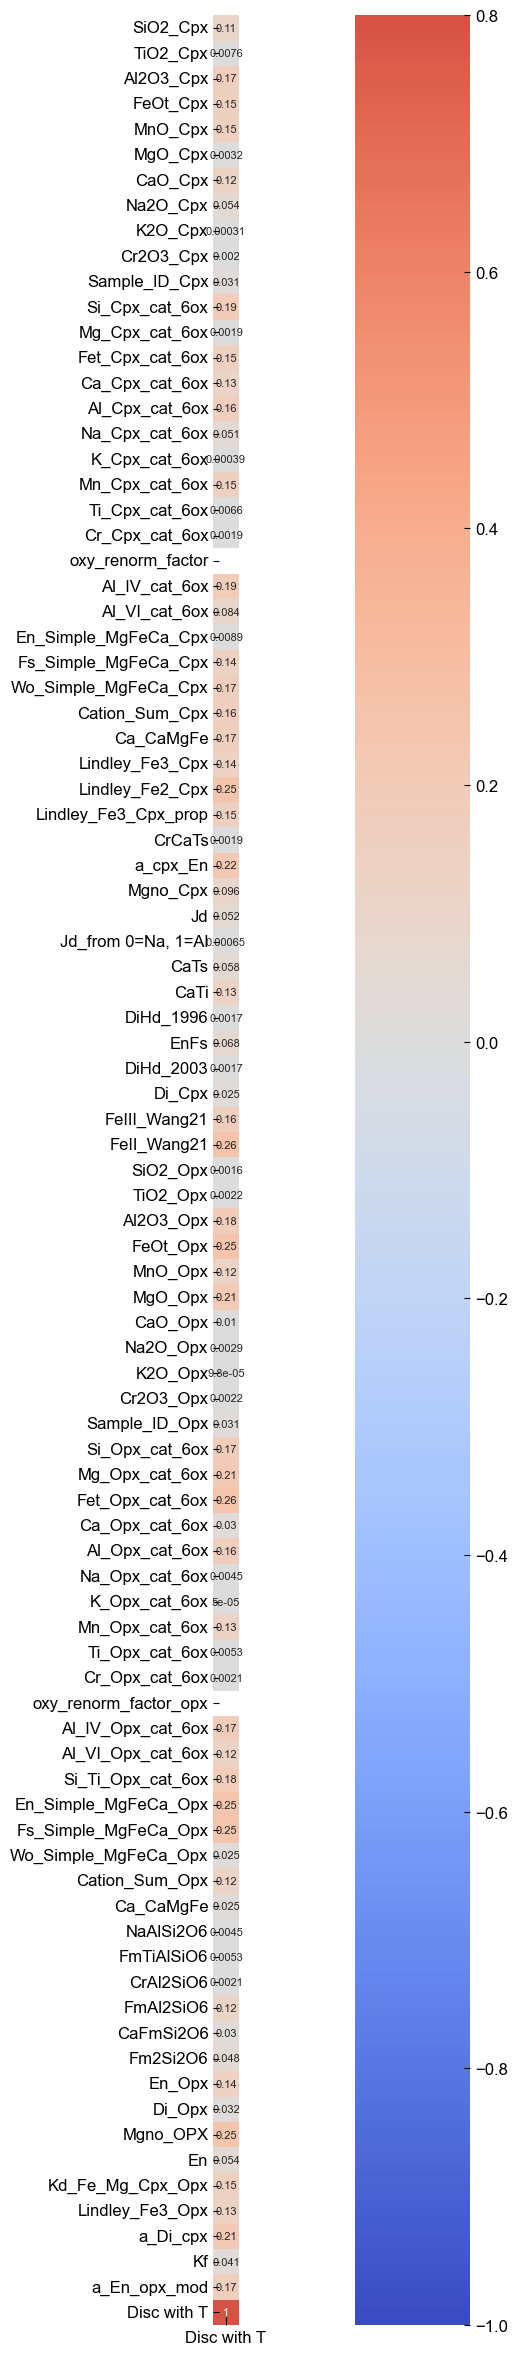

In [14]:
Opx_Cpx_trim=Opx_Cpx.loc[Press_new&(Eq_Mask)]
eq_tests_trim=eq_tests.loc[Press_new&(Eq_Mask)]

plt.plot(eq_tests_trim['Mgno_Cpx'], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)],
         'ok')



import seaborn as sns
eq_tests_trim['Disc with T']= (Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)])
corrmat = eq_tests_trim.corr()
f, ax = plt.subplots(figsize=(30, 30))
x1=corrmat[['Disc with T']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

## Actual figure for review

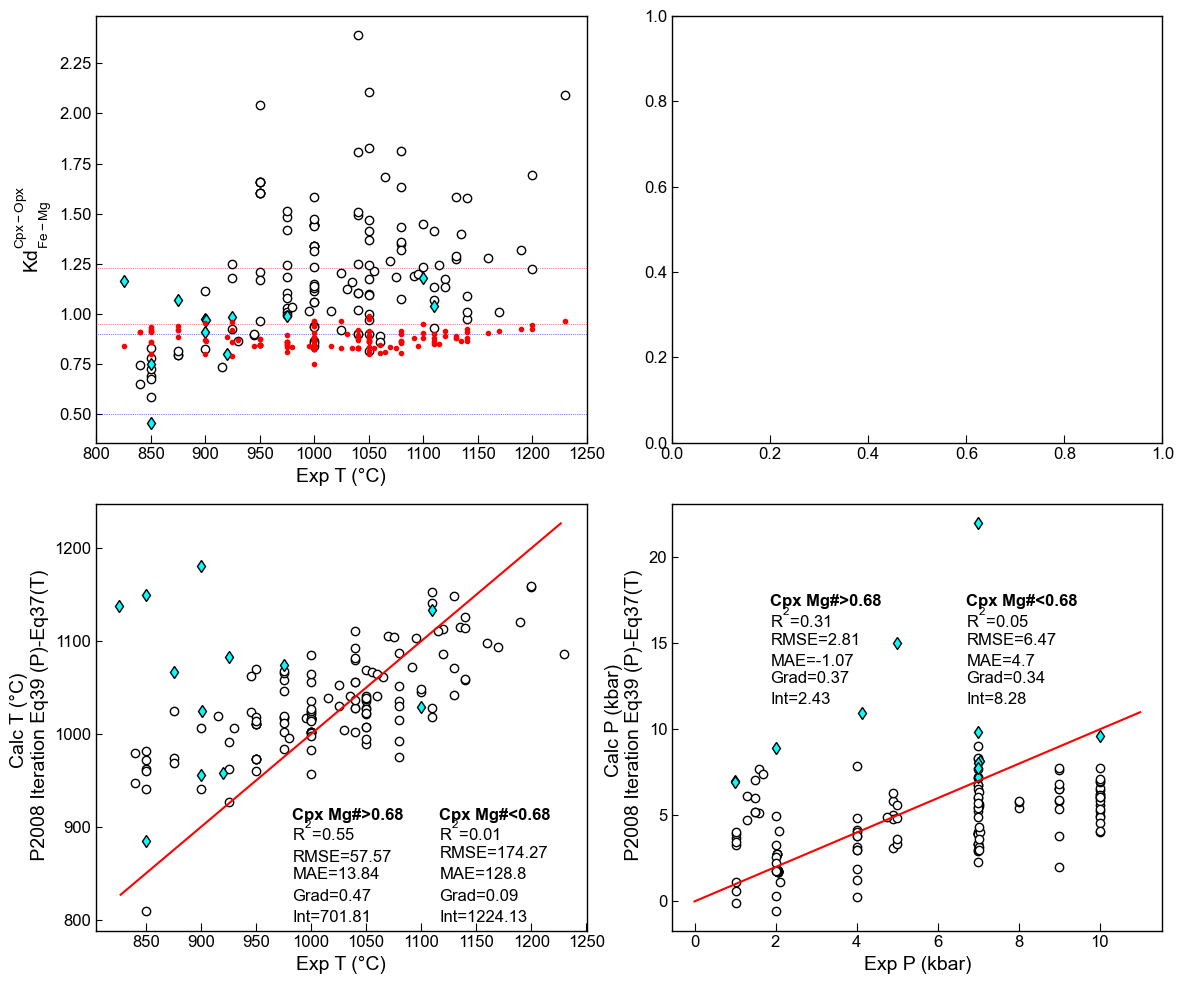

In [30]:
fig, ((ax0, ax3), (ax1, ax2)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here


ax0.plot([800, 1250], [1.09+0.14, 1.09+0.14], ':r', lw=0.5)
ax0.plot([800, 1250], [1.09-0.14, 1.09-0.14], ':r', lw=0.5)
ax0.plot([800, 1250], [0.7+0.2, 0.7+0.2], ':b', lw=0.5)
ax0.plot([800, 1250], [0.7-0.2, 0.7-0.2], ':b', lw=0.5)
ax0.set_xlim([800, 1250])

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&HighCpxMgno]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&HighCpxMgno], 'ok', mfc='white')

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&(~HighCpxMgno)]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&(~HighCpxMgno)], 'dk', mfc='cyan')


ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]-273.15, IdealKd.loc[Press_new&Eq_Mask], '.r')

## Temperature Assesment


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         'ok', mfc='white')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         'dk', mfc='cyan')


ax1.plot([1100-273.15, 1500-273.15], [1100-273.15, 1500-273.15], '-r')

Stats_3937_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)

ax1.annotate("Cpx Mg#>0.68", xy=(0.4, 0.26),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_highMgno['R2'].iloc[0]), xy=(0.4, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_highMgno['RMSE'].iloc[0]), xy=(0.4, 0.16),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_3937_highMgno['Mean'].iloc[0]), xy=(0.4, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3937_highMgno['Grad'].iloc[0]), xy=(0.4, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3937_highMgno['Int'].iloc[0]), xy=(0.4, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3937_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

ax1.annotate("Cpx Mg#<0.68", xy=(0.7, 0.26),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3937_lowMgno['R2'].iloc[0]), xy=(0.7, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3937_lowMgno['RMSE'].iloc[0]), xy=(0.7, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_3937_lowMgno['Mean'].iloc[0]), xy=(0.7, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3937_lowMgno['Grad'].iloc[0]), xy=(0.7, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3937_lowMgno['Int'].iloc[0]), xy=(0.7, 0.02),
xycoords="axes fraction", fontsize=12)

### Pressure testing

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')



Stats_3937_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)
ycoord=0.5
ax2.annotate("Cpx Mg#>0.68", xy=(0.2, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3937_highMgno['R2'].iloc[0]), xy=(0.2, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3937_highMgno['RMSE'].iloc[0]), xy=(0.2, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3937_highMgno['Mean'].iloc[0]), xy=(0.2, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3937_highMgno['Grad'].iloc[0]), xy=(0.2, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3937_highMgno['Int'].iloc[0]), xy=(0.2, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3937_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

ax2.annotate("Cpx Mg#<0.68", xy=(0.6, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3937_lowMgno['R2'].iloc[0]), xy=(0.6, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3937_lowMgno['RMSE'].iloc[0]), xy=(0.6, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3937_lowMgno['Mean'].iloc[0]), xy=(0.6, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3937_lowMgno['Grad'].iloc[0]), xy=(0.6, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3937_lowMgno['Int'].iloc[0]), xy=(0.6, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.plot([0, 11], [0, 11], '-r')

ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Kd$_{Fe-Mg}^{Cpx-Opx}$')

ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Iteration Eq39 (P)-Eq37(T)')

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Iteration Eq39 (P)-Eq37(T)')
fig.tight_layout()
fig.savefig('Opx_Cpx.png', dpi=200, transparent=True)

## Offset vs. Mg# in Cpx

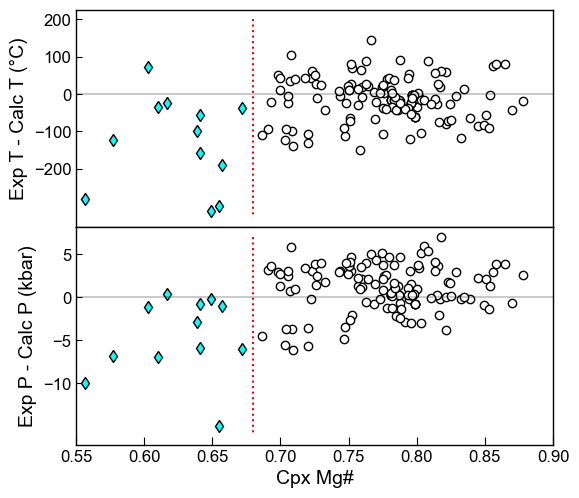

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

ax2.set_yticks([5, 0, -5, -10])
ax2.set_ylabel('Exp P - Calc P (kbar)')
ax1.set_ylabel('Exp T - Calc T (°C)')
ax2.set_xlabel('Cpx Mg#')
ax1.plot([0.68, 0.68], [200, -330], ':r') 
ax2.plot([0.68, 0.68], [7, -16], ':r') 
ax1.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax2.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax1.set_xlim([0.55, 0.9])
ax2.set_xlim([0.55, 0.9])
fig.savefig('Offset_Cpx_Opx.png', dpi=200)

## Temperature instead

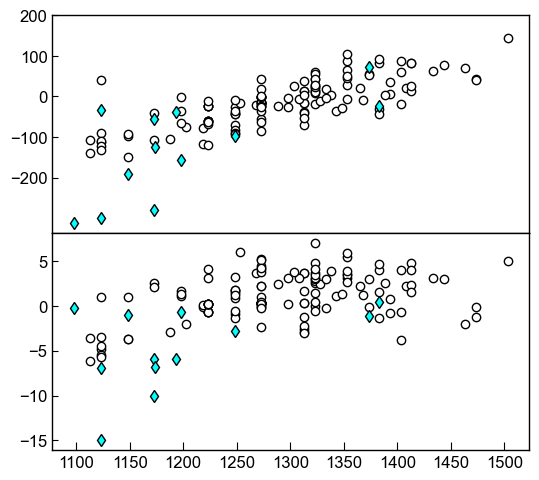

In [17]:


fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

# ax2.set_yticks([5, 0, -5, -10])
# ax2.set_ylabel('Exp P - Calc P (kbar)')
# ax1.set_ylabel('Exp T - Calc T ((°C)')
# ax2.set_xlabel('Cpx Mg#')
# ax1.plot([0.68, 0.68], [200, -330], ':r') 
# ax2.plot([0.68, 0.68], [7, -16], ':r') 

fig.savefig('Offset_Cpx_Opx.png', dpi=200)

## Water instead

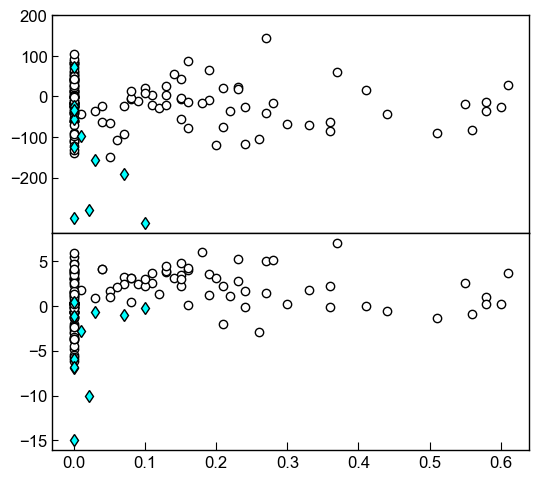

In [18]:


fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
x='Cr2O3_Cpx'
ax1.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(Opx_Cpx[x].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

# ax2.set_yticks([5, 0, -5, -10])
# ax2.set_ylabel('Exp P - Calc P (kbar)')
# ax1.set_ylabel('Exp T - Calc T ((°C)')
# ax2.set_xlabel('Cpx Mg#')
# ax1.plot([0.68, 0.68], [200, -330], ':r') 
# ax2.plot([0.68, 0.68], [7, -16], ':r') 

fig.savefig('Offset_Cpx_Opx.png', dpi=200)

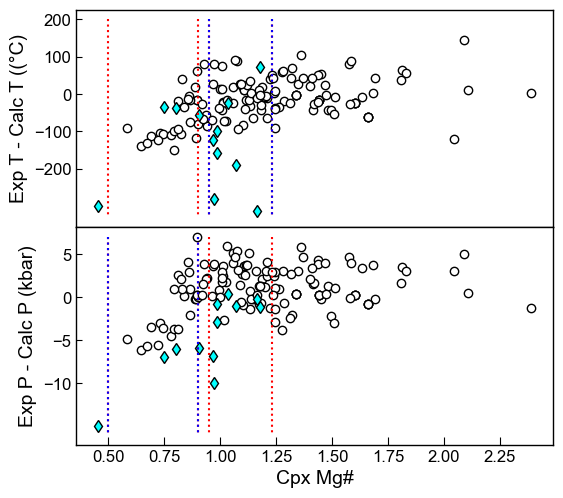

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[~HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Kd_Fe_Mg_Cpx_Opx'].loc[~HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

ax2.set_yticks([5, 0, -5, -10])
ax2.set_ylabel('Exp P - Calc P (kbar)')
ax1.set_ylabel('Exp T - Calc T ((°C)')
ax2.set_xlabel('Cpx Mg#')
ax1.plot([1.09+0.14, 1.09+0.14], [200, -330], ':r') 
ax1.plot([1.09-0.14, 1.09-0.14], [200, -330], ':r') 

ax2.plot([1.09+0.14, 1.09+0.14], [7, -16], ':r') 
ax2.plot([1.09-0.14, 1.09-0.14], [7, -16], ':r') 

ax1.plot([0.5, 0.5], [200, -330], ':r') 
ax1.plot([0.9, 0.9], [200, -330], ':r') 

ax2.plot([0.5, 0.5], [7, -16], ':r') 
ax2.plot([0.9, 0.9], [7, -16], ':r') 



ax1.plot([1.09+0.14, 1.09+0.14], [200, -330], ':b') 
ax1.plot([1.09-0.14, 1.09-0.14], [200, -330], ':b') 

ax2.plot([0.5, 0.5], [7, -16], ':b') 
ax2.plot([0.9, 0.9], [7, -16], ':b') 

fig.savefig('Offset_Cpx_Opx_withKdMg.png', dpi=200)

In [20]:
## Anites paper
print((15.89/40.3044)/((15.89/40.3044)+(9.36/71.844)))
print((15.99/40.3044)/((15.99/40.3044)+(8.64/71.844)))

print((15.98/40.3044)/((15.98/40.3044)+(11.12/71.844)))

0.7516218859282162
0.7673838391645431
0.7192267170077893


## Looking at offsets

In [21]:
len(eq_tests)

256

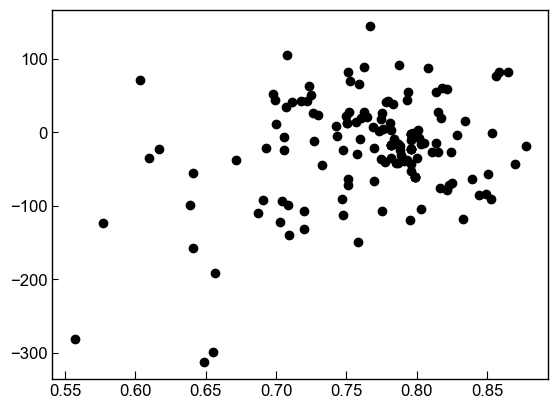

In [22]:
Opx_Cpx_trim=Opx_Cpx.loc[Press_new&(Eq_Mask)]
eq_tests_trim=eq_tests.loc[Press_new&(Eq_Mask)]

plt.plot(eq_tests_trim['Mgno_Cpx'], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['T_K_calc'].loc[Press_new&(Eq_Mask)],
         'ok')

C:\Users\penny\AppData\Local\Temp\ipykernel_14192\366162263.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_tests_trim['Disc with P']= (Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)]


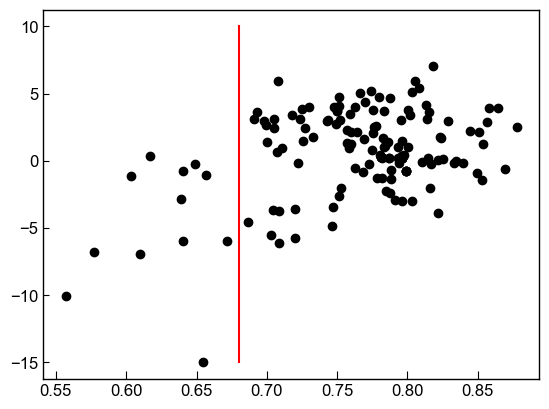

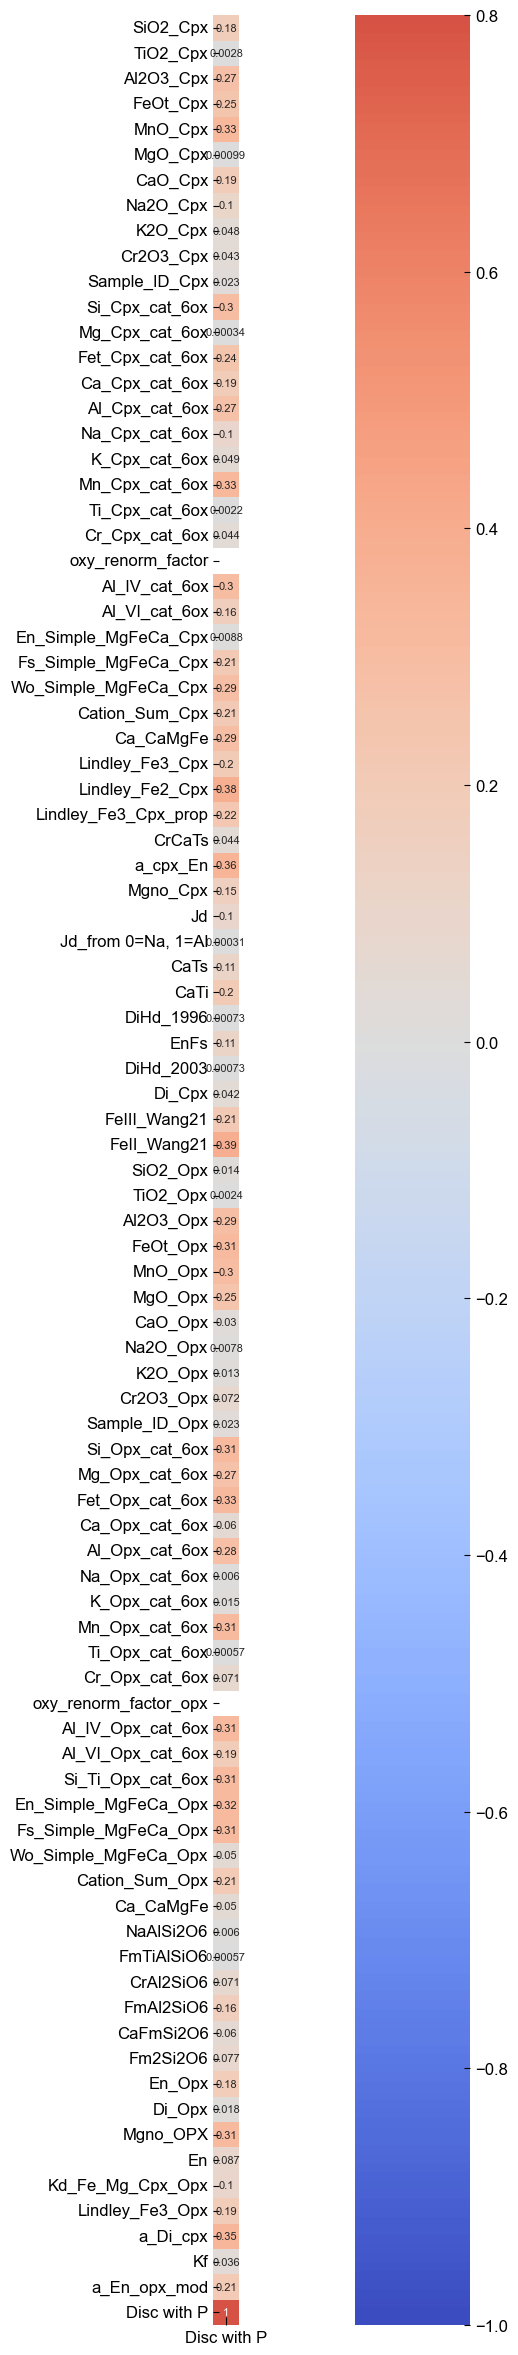

In [23]:
Opx_Cpx_trim=Opx_Cpx.loc[Press_new&(Eq_Mask)]
eq_tests_trim=eq_tests.loc[Press_new&(Eq_Mask)]

plt.plot(eq_tests_trim['Mgno_Cpx'], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)],
         'ok')


plt.plot([0.68, 0.68], [-15, 10], '-r')
import seaborn as sns
eq_tests_trim['Disc with P']= (Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)]
         -Out_39_37['P_kbar_calc'].loc[Press_new&(Eq_Mask)])
corrmat = eq_tests_trim.corr()
f, ax = plt.subplots(figsize=(30, 30))
x1=corrmat[['Disc with P']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

## Figure for supplement, -showing eq36 instead

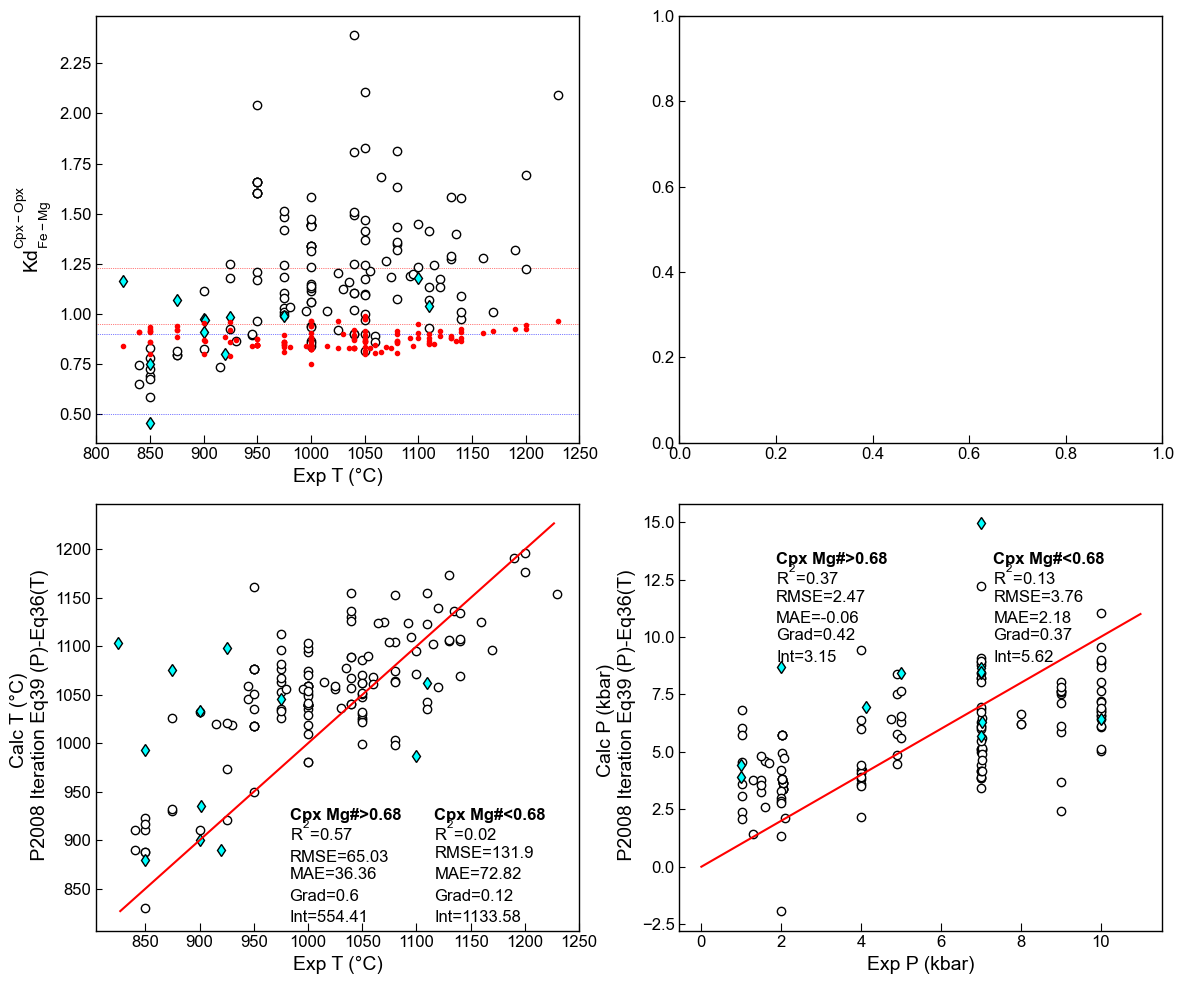

In [35]:
fig, ((ax0, ax3), (ax1, ax2)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here


ax0.plot([800, 1250], [1.09+0.14, 1.09+0.14], ':r', lw=0.5)
ax0.plot([800, 1250], [1.09-0.14, 1.09-0.14], ':r', lw=0.5)
ax0.plot([800, 1250], [0.7+0.2, 0.7+0.2], ':b', lw=0.5)
ax0.plot([800, 1250], [0.7-0.2, 0.7-0.2], ':b', lw=0.5)
ax0.set_xlim([800, 1250])

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&HighCpxMgno]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&HighCpxMgno], 'ok', mfc='white')

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask&(~HighCpxMgno)]-273.15, 
eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask&(~HighCpxMgno)], 'dk', mfc='cyan')


ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask]-273.15, IdealKd.loc[Press_new&Eq_Mask], '.r')

## Temperature Assesment


ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-273.15,
         'ok', mfc='white')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]-273.15,
         'dk', mfc='cyan')


ax1.plot([1100-273.15, 1500-273.15], [1100-273.15, 1500-273.15], '-r')

Stats_3936_highMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)

ax1.annotate("Cpx Mg#>0.68", xy=(0.4, 0.26),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3936_highMgno['R2'].iloc[0]), xy=(0.4, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3936_highMgno['RMSE'].iloc[0]), xy=(0.4, 0.16),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_3936_highMgno['Mean'].iloc[0]), xy=(0.4, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3936_highMgno['Grad'].iloc[0]), xy=(0.4, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3936_highMgno['Int'].iloc[0]), xy=(0.4, 0.02),
xycoords="axes fraction", fontsize=12)

Stats_3936_lowMgno=pt.calculate_R2(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

ax1.annotate("Cpx Mg#<0.68", xy=(0.7, 0.26),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_3936_lowMgno['R2'].iloc[0]), xy=(0.7, 0.21),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_3936_lowMgno['RMSE'].iloc[0]), xy=(0.7, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_3936_lowMgno['Mean'].iloc[0]), xy=(0.7, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_3936_lowMgno['Grad'].iloc[0]), xy=(0.7, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_3936_lowMgno['Int'].iloc[0]), xy=(0.7, 0.02),
xycoords="axes fraction", fontsize=12)

### Pressure testing

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')



Stats_3936_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)
ycoord=0.6
ax2.annotate("Cpx Mg#>0.68", xy=(0.2, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3936_highMgno['R2'].iloc[0]), xy=(0.2, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3936_highMgno['RMSE'].iloc[0]), xy=(0.2, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3936_highMgno['Mean'].iloc[0]), xy=(0.2, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3936_highMgno['Grad'].iloc[0]), xy=(0.2, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3936_highMgno['Int'].iloc[0]), xy=(0.2, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3936_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

x_offset=0.05
ax2.annotate("Cpx Mg#<0.68", xy=(0.6+x_offset, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3936_lowMgno['R2'].iloc[0]), xy=(0.6+x_offset, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3936_lowMgno['RMSE'].iloc[0]), xy=(0.6+x_offset, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3936_lowMgno['Mean'].iloc[0]), xy=(0.6+x_offset, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3936_lowMgno['Grad'].iloc[0]), xy=(0.6+x_offset, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3936_lowMgno['Int'].iloc[0]), xy=(0.6+x_offset, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.plot([0, 11], [0, 11], '-r')

ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Kd$_{Fe-Mg}^{Cpx-Opx}$')

ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Iteration Eq39 (P)-Eq36(T)')

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Iteration Eq39 (P)-Eq36(T)')
fig.tight_layout()
fig.savefig('Opx_Cpx_eq36.png', dpi=200, transparent=True)

## Same for Eq 38

(array([136.,   5.,   2.,  10.,   0.,   1.,   5.,   4.,   0.,   7.,   4.,
          5.,   5.,   0.,   3.,   6.,   6.,   0.,   2.,   4.,   3.,   0.,
          3.,   4.,   3.,   1.,   0.,   2.,   3.,   4.,   0.,   2.,   2.,
          0.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   0.,   1.,   0.,
          1.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([0.        , 0.0077    , 0.0154    , 0.0231    , 0.0308    ,
        0.0385    , 0.0462    , 0.0539    , 0.0616    , 0.0693    ,
        0.077     , 0.0847    , 0.0924    , 0.1001    , 0.1078    ,
        0.1155    , 0.1232    , 0.1309    , 0.1386    , 0.1463    ,
        0.154     , 0.1617    , 0.1694    , 0.

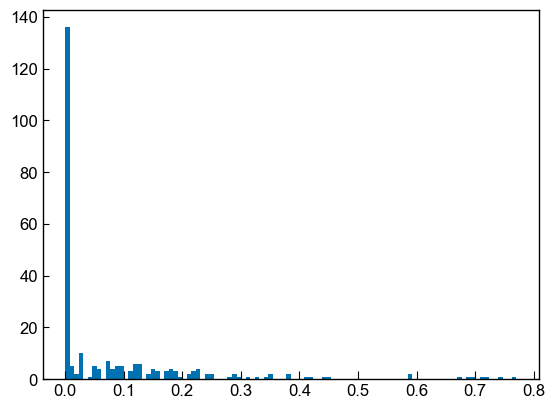

In [43]:
plt.hist(Opx_Cpx['Cr2O3_Opx'], bins=100)

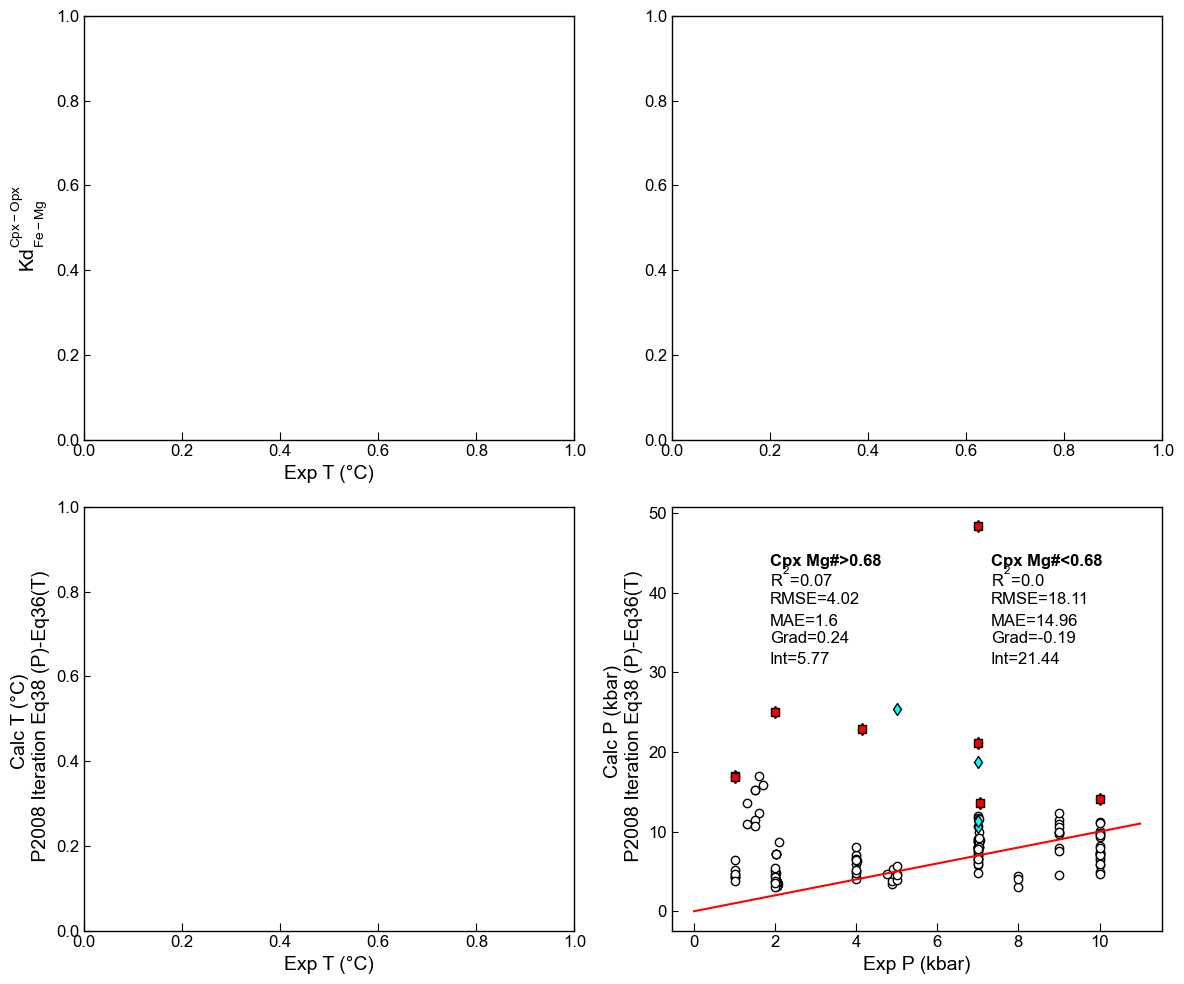

In [44]:
fig, ((ax0, ax3), (ax1, ax2)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here

NoCr=Opx_Cpx['Cr2O3_Opx']==0


ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')


ax2.plot(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)&NoCr],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)&NoCr],
         'sk', mfc='red')




Stats_3836_highMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno], xy=False, df=True)
ycoord=0.6
ax2.annotate("Cpx Mg#>0.68", xy=(0.2, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3836_highMgno['R2'].iloc[0]), xy=(0.2, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3836_highMgno['RMSE'].iloc[0]), xy=(0.2, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3836_highMgno['Mean'].iloc[0]), xy=(0.2, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3836_highMgno['Grad'].iloc[0]), xy=(0.2, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3836_highMgno['Int'].iloc[0]), xy=(0.2, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)

Stats_3836_lowMgno=pt.calculate_R2(Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)], xy=False, df=True)

x_offset=0.05
ax2.annotate("Cpx Mg#<0.68", xy=(0.6+x_offset, 0.26+ycoord),
xycoords="axes fraction", fontsize=12, fontweight='bold')
ax2.annotate("R$^{2}$="+str(Stats_3836_lowMgno['R2'].iloc[0]), xy=(0.6+x_offset, 0.21+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_3836_lowMgno['RMSE'].iloc[0]), xy=(0.6+x_offset, 0.17+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_3836_lowMgno['Mean'].iloc[0]), xy=(0.6+x_offset, 0.12+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(Stats_3836_lowMgno['Grad'].iloc[0]), xy=(0.6+x_offset, 0.08+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(Stats_3836_lowMgno['Int'].iloc[0]), xy=(0.6+x_offset, 0.03+ycoord),
xycoords="axes fraction", fontsize=12)
ax2.plot([0, 11], [0, 11], '-r')

ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Kd$_{Fe-Mg}^{Cpx-Opx}$')

ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Iteration Eq38 (P)-Eq36(T)')

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Iteration Eq38 (P)-Eq36(T)')
fig.tight_layout()
fig.savefig('Opx_Cpx_eq38.png', dpi=200, transparent=True)

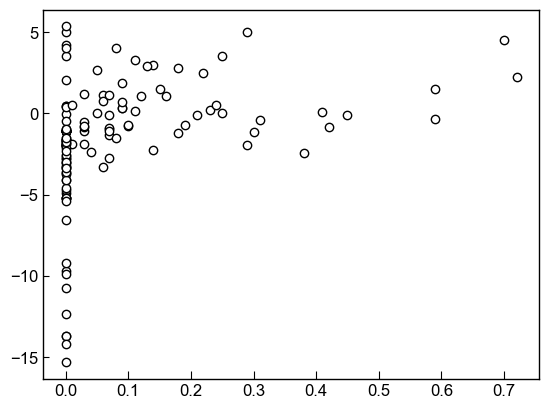

In [39]:
plt.plot(Opx_Cpx['Cr2O3_Opx'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-
         Out_38_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

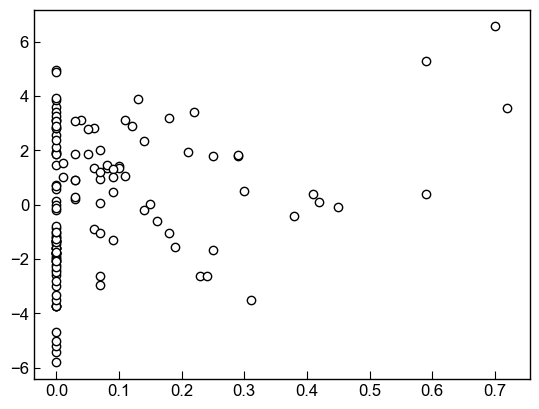

In [41]:
plt.plot(Opx_Cpx['Cr2O3_Opx'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&HighCpxMgno]-
         Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&HighCpxMgno],
         'ok', mfc='white')

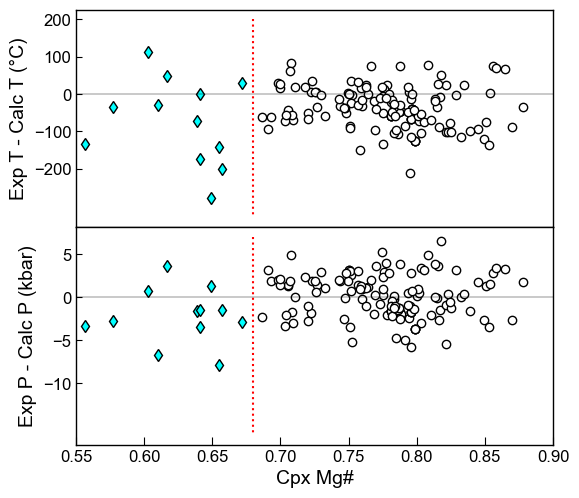

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (6*1.026,5*1.13)) # adjust dimensions of figure here
ax1.axes.get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)]
         -Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(HighCpxMgno)],
         'ok', mfc='white')


ax1.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_36['T_K_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')
ax1.set_yticks([200, 100, 0, -100, -200])

ax2.plot(eq_tests_trim['Mgno_Cpx'].loc[~HighCpxMgno], 
         Opx_Cpx['P_kbar_x'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)]
         -Out_39_36['P_kbar_calc'].loc[Press_new&(Eq_Mask)&(~HighCpxMgno)],
         'dk', mfc='cyan')

ax2.set_yticks([5, 0, -5, -10])
ax2.set_ylabel('Exp P - Calc P (kbar)')
ax1.set_ylabel('Exp T - Calc T (°C)')
ax2.set_xlabel('Cpx Mg#')
ax1.plot([0.68, 0.68], [200, -330], ':r') 
ax2.plot([0.68, 0.68], [7, -16], ':r') 
ax1.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax2.plot([0.55, 0.9], [0, 0], '-k', lw=0.3)
ax1.set_xlim([0.55, 0.9])
ax2.set_xlim([0.55, 0.9])
fig.savefig('Offset_Cpx_Opx_eq36.png', dpi=200)

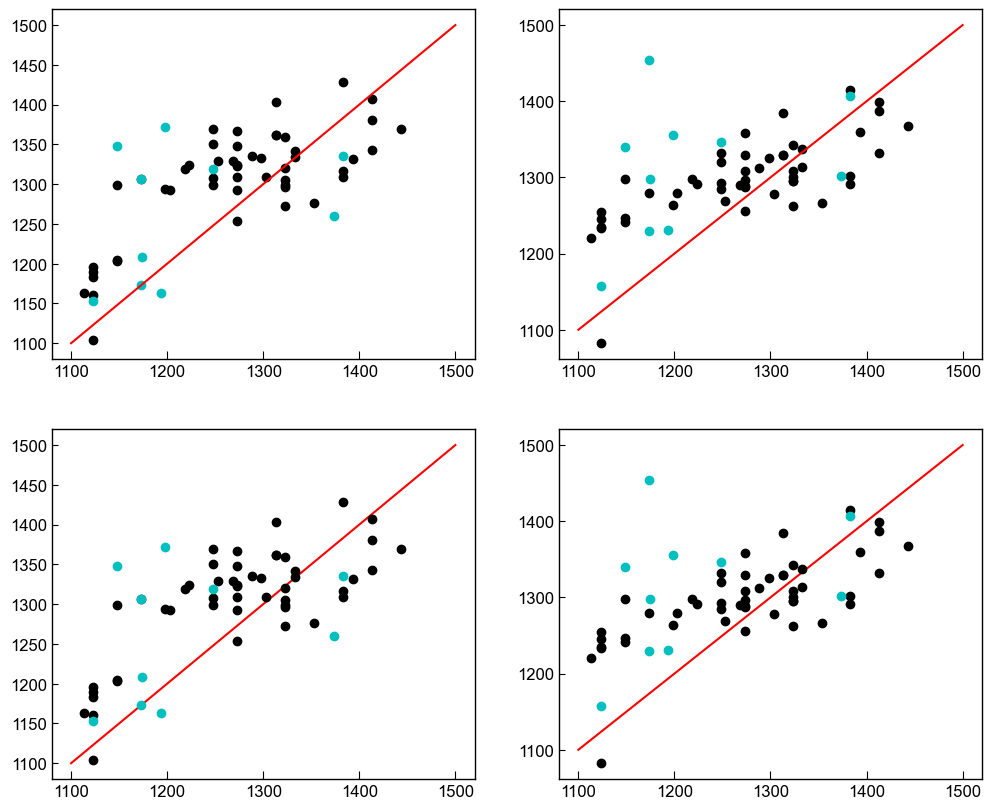

In [24]:
KdEq=np.abs(IdealKd-eq_tests['Kd_Fe_Mg_Cpx_Opx'])<0.25



fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here

HighCpxMgno=Out_39_36['Mgno_Cpx']>0.68
ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         'ok')

ax0.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         'ok')

ax1.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

ax0.plot([1100, 1500], [1100, 1500], '-r')
ax1.plot([1100, 1500], [1100, 1500], '-r')
ax2.plot([1100, 1500], [1100, 1500], '-r')
ax3.plot([1100, 1500], [1100, 1500], '-r')

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         Out_39_36['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         'ok')

ax2.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_36['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

ax3.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         Out_39_37['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&HighCpxMgno],
         'ok')

ax3.plot(Opx_Cpx['T_K_x'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         Out_39_37['T_K_calc'].loc[Press_new&(KdEq)&(Eq_Mask)&(~HighCpxMgno)],
         'oc')

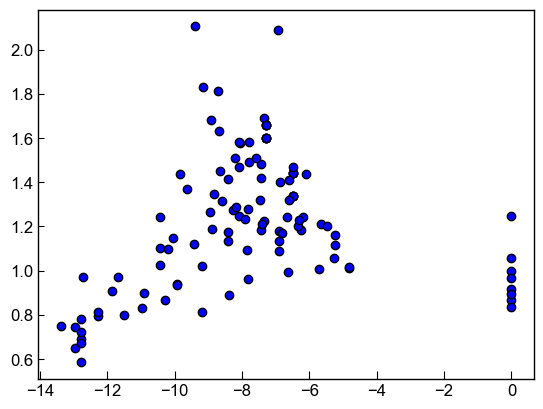

In [25]:
plt.plot(Opx_Cpx['logfo2'].loc[Press_new&Eq_Mask], 
          eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')

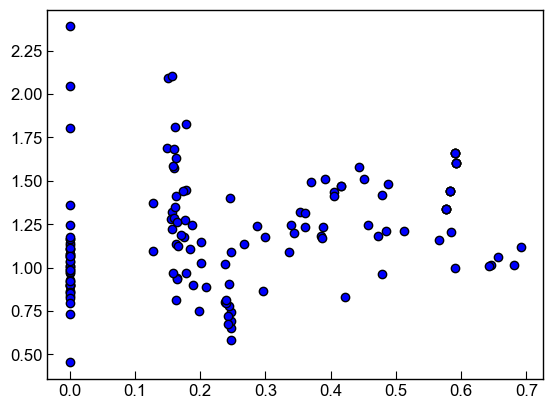

In [26]:

plt.plot(myLiquids_Fe3_Kress['Fe3Fet_Liq'].loc[Press_new&Eq_Mask], 
          eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')

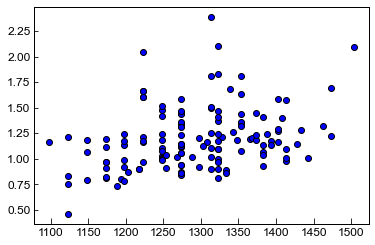

In [66]:

plt.plot(Opx_Cpx['T_K_x'].loc[Press_new&Eq_Mask], 
          eq_tests['Kd_Fe_Mg_Cpx_Opx'].loc[Press_new&Eq_Mask], 'ok', mfc='blue')

## Synthetic composition to assess effect of changing Cr

In [67]:
myOpxs1.iloc[0:2]

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx,P_kbar,T_K
0,48.599998,0.31,5.90,26.40,0.72,15.700000,1.79,0.07,0.05,0.00,0,12.0,1173.15
1,56.320000,0.13,1.41,10.17,0.26,30.879999,1.05,0.02,0.00,0.16,1,2.0,1253.15


In [68]:
myOPXs2=myOpxs1.iloc[0:2]
DupOPXs = pd.DataFrame(np.repeat(myOPXs2.values,
30, axis=0))
DupOPXs.columns = myOPXs2.columns
DupOPXs['index']=DupOPXs.index
DupOPXs['Cr2O3_Opx']=DupOPXs['index']*0.023
DupOPXs.head()

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx,P_kbar,T_K,index
0,48.599998,0.31,5.9,26.4,0.72,15.7,1.79,0.07,0.05,0.000,0.0,12.0,1173.15,0
1,48.599998,0.31,5.9,26.4,0.72,15.7,1.79,0.07,0.05,0.023,0.0,12.0,1173.15,1
2,48.599998,0.31,5.9,26.4,0.72,15.7,1.79,0.07,0.05,0.046,0.0,12.0,1173.15,2
3,48.599998,0.31,5.9,26.4,0.72,15.7,1.79,0.07,0.05,0.069,0.0,12.0,1173.15,3
4,48.599998,0.31,5.9,26.4,0.72,15.7,1.79,0.07,0.05,0.092,0.0,12.0,1173.15,4


In [69]:
myCPXs2=myCpxs1.iloc[0:2]
DupCPXs = pd.DataFrame(np.repeat(myCPXs2.values,
30, axis=0))
DupCPXs.columns = myCPXs2.columns
DupCPXs['index']=DupCPXs.index
DupCPXs.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,index
0,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.0,0.0,12.0,1173.15,0
1,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.0,0.0,12.0,1173.15,1
2,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.0,0.0,12.0,1173.15,2
3,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.0,0.0,12.0,1173.15,3
4,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.0,0.0,12.0,1173.15,4


In [70]:
Out_39_CrVariation=pt.calculate_cpx_opx_press(cpx_comps=DupCPXs.iloc[0:30], opx_comps=DupOPXs.iloc[0:30], equationP="P_Put2008_eq39",
                                             T=Opx_Cpx['T_K_x'][0], eq_tests=True)

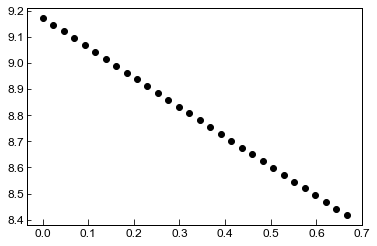

In [71]:
plt.plot(Out_39_CrVariation['Cr2O3_Opx'], Out_39_CrVariation['P_kbar_calc'],  'ok')

## Is it Cr in Cpx thats the issue then

In [72]:
myOPXs2D=myOpxs1.iloc[0:2]
Dup2OPXs = pd.DataFrame(np.repeat(myOPXs2.values,
30, axis=0))
Dup2OPXs.columns = myOPXs2.columns
Dup2OPXs['index']=Dup2OPXs.index
Dup2OPXs.head()

myCPXs2D=myCpxs1.iloc[0:2]
Dup2CPXs = pd.DataFrame(np.repeat(myCPXs2.values,
30, axis=0))
Dup2CPXs.columns = myCPXs2.columns
Dup2CPXs['index']=Dup2CPXs.index
Dup2CPXs['Cr2O3_Cpx']=Dup2CPXs['index']*0.023

Dup2CPXs.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,index
0,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.000,0.0,12.0,1173.15,0
1,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.023,0.0,12.0,1173.15,1
2,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.046,0.0,12.0,1173.15,2
3,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.069,0.0,12.0,1173.15,3
4,48.799999,0.64,6.53,16.200001,0.5,10.1,16.4,0.64,0.07,0.092,0.0,12.0,1173.15,4


In [73]:
Out_39_CrVariation2=pt.calculate_cpx_opx_press(cpx_comps=Dup2CPXs.iloc[0:30], 
                opx_comps=Dup2OPXs.iloc[0:30], equationP="P_Put2008_eq39",
                T=Opx_Cpx['T_K_x'][0], eq_tests=True)

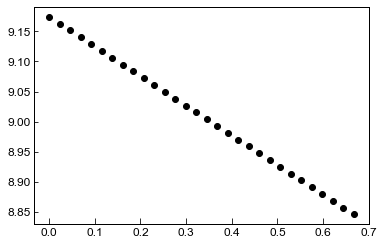

In [74]:
plt.plot(Out_39_CrVariation2['Cr2O3_Cpx'], Out_39_CrVariation2['P_kbar_calc'],  'ok')

In [75]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Out_39_FixedT=pt.calculate_cpx_opx_press(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq39",
                                             T=Opx_Cpx['T_K_x'], eq_tests=True)
    y_39=Out_39_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_39_FixedT=pt.calculate_R2(x, y_39['P_kbar_calc']) # 39 Fixed T
    
    Out_38_FixedT=pt.calculate_cpx_opx_press(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationP="P_Put2008_eq38",
                                             T=Opx_Cpx['T_K_x'], eq_tests=True)
    y_38=Out_38_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_38_FixedT=pt.calculate_R2(x, y_38['P_kbar_calc']) # 39 Fixed T

    
Dict_39_FixedT = {'R$^{2}$': Eq_39_FixedT['R2'], 'p val': Eq_39_FixedT['P_val'], 'RMSE (kbar)': Eq_39_FixedT['RMSE'], 'Median Error (kbar)': Eq_39_FixedT['Median'], 'Mean Error (kbar)': Eq_39_FixedT['Mean']}
Dict_38_FixedT = {'R$^{2}$': Eq_38_FixedT['R2'],  'p val': Eq_38_FixedT['P_val'], 'RMSE (kbar)': Eq_38_FixedT['RMSE'], 'Median Error (kbar)': Eq_38_FixedT['Median'], 'Mean Error (kbar)': Eq_38_FixedT['Mean']}


Youve selected a T-independent function


## Biggest discrepency plots

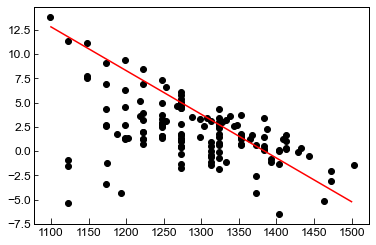

In [76]:
plt.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)], x-y_39['P_kbar_calc'], 'ok')
tlin=np.linspace(1100, 1500)
T_Effect=0.045 * (tlin - 273.15)
plt.plot(tlin, -T_Effect+50, '-r')

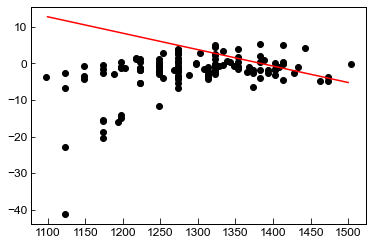

In [17]:
plt.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)], x-y_38['P_kbar_calc'], 'ok')
tlin=np.linspace(1100, 1500)
T_Effect=0.045 * (tlin - 273.15)
plt.plot(tlin, -T_Effect+50, '-r')

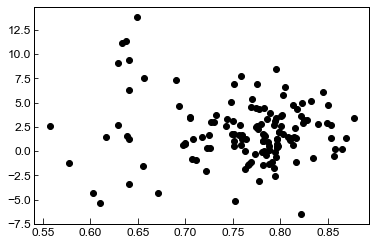

In [18]:
plt.plot(eq_tests['Mgno_CPX'].loc[Press_new&(Eq_Mask)], x-y_39['P_kbar_calc'], 'ok')

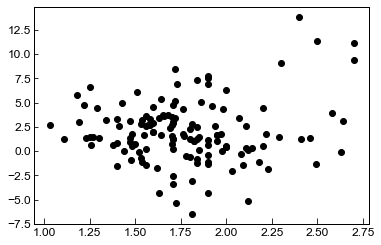

In [19]:
plt.plot(eq_tests['CaO_Opx'].loc[Press_new&(Eq_Mask)], x-y_39['P_kbar_calc'], 'ok')

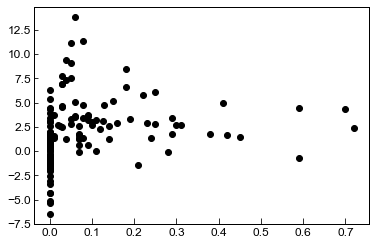

In [20]:
SomeCr=eq_tests['Cr2O3_Opx']>0
plt.plot(eq_tests['Cr2O3_Opx'].loc[Press_new&(Eq_Mask)], x-y_39['P_kbar_calc'], 'ok')

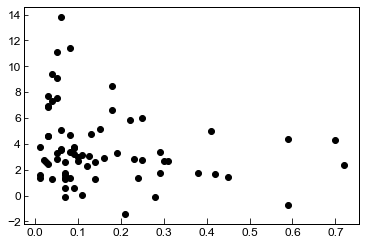

In [21]:
SomeCr=eq_tests['Cr2O3_Opx']>0
plt.plot(eq_tests['Cr2O3_Opx'].loc[Press_new&(Eq_Mask)&SomeCr], 
         x.loc[SomeCr]-y_39['P_kbar_calc'].loc[SomeCr], 'ok')

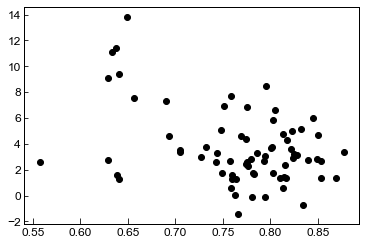

In [22]:
SomeCr=eq_tests['Cr2O3_Opx']>0
plt.plot(eq_tests['Mgno_CPX'].loc[Press_new&(Eq_Mask)&SomeCr], 
         x.loc[SomeCr]-y_39['P_kbar_calc'].loc[SomeCr], 'ok')

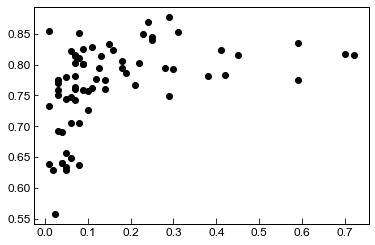

In [23]:
plt.plot(eq_tests['Cr2O3_Opx'].loc[Press_new&(Eq_Mask)&SomeCr], 
         eq_tests['Mgno_CPX'].loc[Press_new&(Eq_Mask)&SomeCr], 'ok')

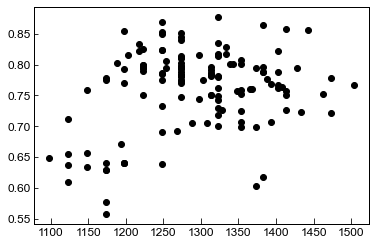

In [24]:
plt.plot(Opx_Cpx['T_K_x'].loc[Press_new&(Eq_Mask)], eq_tests['Mgno_CPX'].loc[Press_new&(Eq_Mask)], 'ok')


## Calculating pressure, Iterate T, known Water

Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Youve selected a T-independent function


## Summary table for pressure - known water contents

## Assessing temperature, using R2 etc. 

In [26]:
Put_Wood1973_knownP=pt.calculate_cpx_opx_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationT="T_Wood1973", P=Opx_Cpx['P_kbar_x'])
y_Put_Wood1973_knownP=Put_Wood1973_knownP.loc[Press_new&(Eq_Mask)]
Stats_Wood1973_knownP=pt.calculate_R2(xT,y_Put_Wood1973_knownP) 
Dict_Wood1973_knownP = {'R$^{2}$': Stats_Wood1973_knownP['R2'],  'p val': Stats_Wood1973_knownP['P_val'],
                        'RMSE (°C)': Stats_Wood1973_knownP['RMSE'], 'Median Error (°C)': Stats_Wood1973_knownP['Median'], 'Mean Error (°C)': Stats_Wood1973_knownP['Mean']}

Put_Brey1990_knownP=pt.calculate_cpx_opx_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationT="T_Brey1990", P=Opx_Cpx['P_kbar_x'])
y_Put_Brey1990_knownP=Put_Brey1990_knownP.loc[Press_new&(Eq_Mask)]
Stats_Brey1990_knownP=pt.calculate_R2(xT,y_Put_Brey1990_knownP) 
Dict_Brey1990_knownP = {'R$^{2}$': Stats_Brey1990_knownP['R2'],  'p val': Stats_Brey1990_knownP['P_val'],
                        'RMSE (°C)': Stats_Brey1990_knownP['RMSE'], 'Median Error (°C)': Stats_Brey1990_knownP['Median'], 'Mean Error (°C)': Stats_Brey1990_knownP['Mean']}

Put_Wells1977_knownP=pt.calculate_cpx_opx_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationT="T_Wells1977", P=Opx_Cpx['P_kbar_x'])
y_Put_Wells1977_knownP=Put_Wells1977_knownP.loc[Press_new&(Eq_Mask)]
Stats_Wells1977_knownP=pt.calculate_R2(xT,y_Put_Wells1977_knownP) 
Dict_Wells1977_knownP = {'R$^{2}$': Stats_Wells1977_knownP['R2'],  'p val': Stats_Wells1977_knownP['P_val'],
                        'RMSE (°C)': Stats_Wells1977_knownP['RMSE'], 'Median Error (°C)': Stats_Wells1977_knownP['Median'], 'Mean Error (°C)': Stats_Wells1977_knownP['Mean']}

Put_eq36_knownP=pt.calculate_cpx_opx_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationT="T_Put2008_eq36", P=Opx_Cpx['P_kbar_x'])
y_Put_eq36_knownP=Put_eq36_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq36_knownP=pt.calculate_R2(xT,y_Put_eq36_knownP) 
Dict_eq36_knownP = {'R$^{2}$': Stats_eq36_knownP['R2'],  'p val': Stats_eq36_knownP['P_val'],
                        'RMSE (°C)': Stats_eq36_knownP['RMSE'], 'Median Error (°C)': Stats_eq36_knownP['Median'], 'Mean Error (°C)': Stats_eq36_knownP['Mean']}

Put_eq37_knownP=pt.calculate_cpx_opx_temp(cpx_comps=myCpxs1, opx_comps=myOpxs1, equationT="T_Put2008_eq37", P=Opx_Cpx['P_kbar_x'])
y_Put_eq37_knownP=Put_eq37_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq37_knownP=pt.calculate_R2(xT,y_Put_eq37_knownP) 
Dict_eq37_knownP = {'R$^{2}$': Stats_eq37_knownP['R2'],  'p val': Stats_eq37_knownP['P_val'],
                        'RMSE (°C)': Stats_eq37_knownP['RMSE'], 'Median Error (°C)': Stats_eq37_knownP['Median'], 'Mean Error (°C)': Stats_eq37_knownP['Mean']}






Youve selected a P-independent function
Youve selected a P-independent function


In [27]:

SummaryTable_WithWater=pd.DataFrame({
                           'P=Put2008_eq38, T-independent':pd.Series(Dict_38_FixedT),   
                           'P=Put2008_eq39, T=Exp':pd.Series(Dict_39_FixedT), 
                           'P=Put2008_eq39, T=Put2008_eq36':pd.Series(Dict_39_36),   
                           'P=Put2008_eq39, T=Put2008_eq37':pd.Series(Dict_39_37), 
                           'P=Put2008_eq39, T=Brey1990':pd.Series(Dict_39_Brey1990),
                           'P=Put2008_eq39, T=Wells1977':pd.Series(Dict_39_Wells1977),    
                           'P=Put2008_eq39, T=Wood1973':pd.Series(Dict_39_Wood1973),     
}       
).T

Temp_knownH=pd.DataFrame({'T=Put2008_eq36, P=Exp':pd.Series(Dict_eq36_knownP),
                          'T=Put2008_eq37, P=Exp':pd.Series(Dict_eq37_knownP),
                          'T=Brey1990, P=Exp':pd.Series(Dict_Brey1990_knownP),                             
                        'T=Wood1973, P-independent':pd.Series(Dict_Wood1973_knownP),
                          'T=Wells1977, P-independent':pd.Series(Dict_Wells1977_knownP),  
                           'T=Put2008_eq36, P=Put2008_eq39':pd.Series(TDict_39_36),   
                           'T=Put2008_eq37, P=Put2008_eq39':pd.Series(TDict_39_37), 
                           'T=Brey1990, P=Put2008_eq39':pd.Series(TDict_39_Brey1990),
                           'T=Put2008_eq36, P=Put2008_eq38':pd.Series(TDict_38_36),   
                           'T=Put2008_eq37, P=Put2008_eq38':pd.Series(TDict_38_37), 
                           'T=Brey1990, P=Put2008_eq38':pd.Series(TDict_38_Brey1990) }).T
print('error')
print('Temperature Predictions')
display(Temp_knownH)
display(SummaryTable_WithWater)

error
Temperature Predictions


,R$^{2}$,p val,RMSE (°C),Median Error (°C),Mean Error (°C)
"T=Put2008_eq36, P=Exp",0.40,0.000,77.73,34.94,43.02
"T=Put2008_eq37, P=Exp",0.33,0.000,74.11,20.45,28.11
"T=Brey1990, P=Exp",0.45,0.000,71.03,34.06,33.97
"T=Wood1973, P-independent",0.36,0.000,89.79,61.11,58.13
"T=Wells1977, P-independent",0.20,0.000,96.67,58.90,56.72
"T=Put2008_eq36, P=Put2008_eq39",0.33,0.000,81.41,35.04,42.69
"T=Put2008_eq37, P=Put2008_eq39",0.22,0.000,79.33,16.52,23.86
"T=Brey1990, P=Put2008_eq39",0.39,0.000,73.69,33.07,32.21
"T=Put2008_eq36, P=Put2008_eq38",0.22,0.000,94.26,43.77,55.65
"T=Put2008_eq37, P=Put2008_eq38",0.11,0.000,94.24,26.89,39.77


,R$^{2}$,p val,RMSE (kbar),Median Error (kbar),Mean Error (kbar)
"P=Put2008_eq38, T-independent",0.04,0.014,6.16,1.19,2.31
"P=Put2008_eq39, T=Exp",0.27,0.000,3.75,-1.59,-1.99
"P=Put2008_eq39, T=Put2008_eq36",0.27,0.000,2.65,-0.34,-0.07
"P=Put2008_eq39, T=Put2008_eq37",0.19,0.000,3.25,-1.08,-0.91
"P=Put2008_eq39, T=Brey1990",0.06,0.004,3.30,-0.86,-0.54
"P=Put2008_eq39, T=Wells1977",0.06,0.003,3.62,0.32,0.57
"P=Put2008_eq39, T=Wood1973",0.06,0.003,3.40,0.74,0.63


## Figure for Text - equation 39, 37

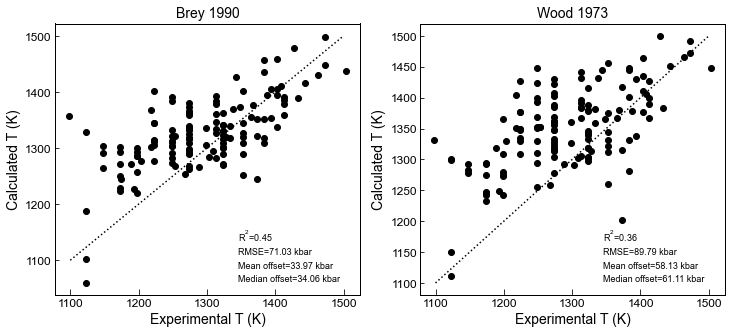

In [28]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_Put_Brey1990_knownP, 'ok')
ax2.plot(xT, y_Put_Wood1973_knownP, 'ok')
ax1.plot([1100, 1500], [1100, 1500], ':k')
ax2.plot([1100, 1500], [1100, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Stats_Brey1990_knownP
model_Eq=Stats_Wood1973_knownP
ax1.set_title('Brey 1990')
ax2.set_title('Wood 1973')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/AllMgno_Temperature_KnownP_Brey1990Wood173.png')

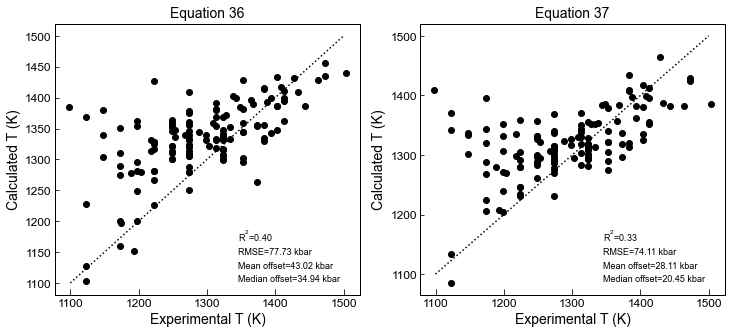

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_Put_eq36_knownP, 'ok')
ax2.plot(xT, y_Put_eq37_knownP, 'ok')
ax1.plot([1100, 1500], [1100, 1500], ':k')
ax2.plot([1100, 1500], [1100, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Stats_eq36_knownP
model_Eq=Stats_eq37_knownP
ax1.set_title('Equation 36')
ax2.set_title('Equation 37')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/LowMgno_Temperature_KnownP_3637.png')

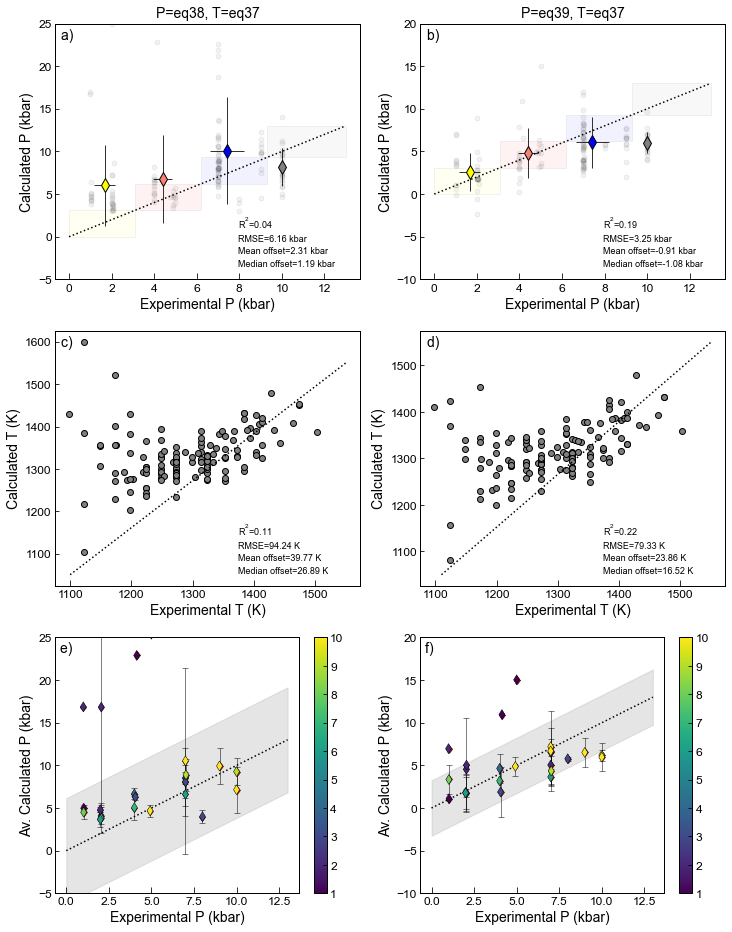

In [30]:
vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)
# 2nd model 
model=y_39_37
model_Eq=Eq_39_37
model_EqT=TEq_39_37

model_H=y_38_37
model_H_Eq=Eq_38_37
model_H_EqT=TEq_38_37

model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']
model_RMSE=model_Eq['RMSE_num']

str_H=str('P=eq38, T=eq37')
str_noH=str('P=eq39, T=eq37')

# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

y2=model['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Opx_Cpx.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Opx_Cpx.loc[Press_new&Eq_Mask], model)


y5=model_H['T_K_calc']
y6=model['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_RMSE, 13+model_RMSE], [0-model_RMSE, 13-model_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')
ax1.set_ylim([-5, 25])
ax2.set_ylim([-10, 20])
ax3.set_ylim([-5, 25])
ax4.set_ylim([-10, 20])
fig.savefig(r'../Calibration_Datasets/LowMgno_Opx_Cpx_Eq3839_37.png', dpi=100)


## Just calculated pressures

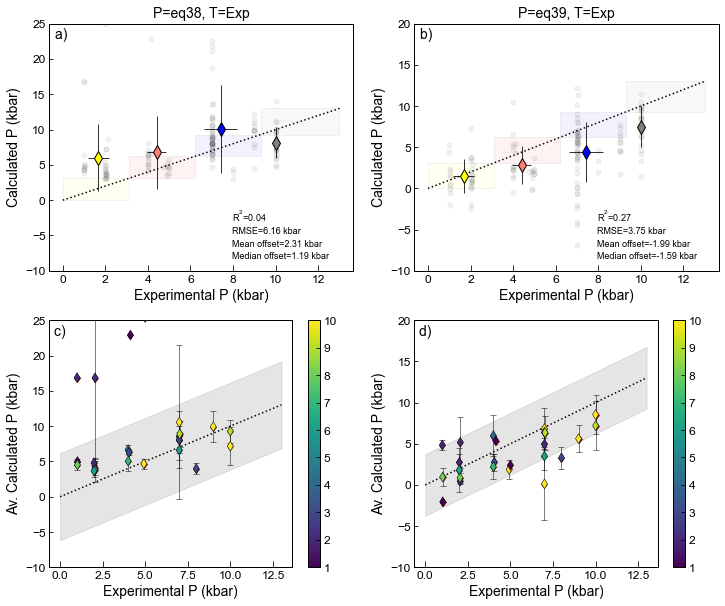

In [31]:
vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)
# 2nd model 
model=y_39
model_Eq=Eq_39_FixedT


model_H=y_38
model_H_Eq=Eq_38_FixedT

model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']
model_RMSE=model_Eq['RMSE_num']

str_H=str('P=eq38, T=Exp')
str_noH=str('P=eq39, T=Exp')

# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

y2=model['P_kbar_calc']# y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Opx_Cpx['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Opx_Cpx.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Opx_Cpx.loc[Press_new&Eq_Mask], model)



vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_RMSE, 13+model_RMSE], [0-model_RMSE, 13-model_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')


ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')

ax1.set_ylim([-10, 25])
ax2.set_ylim([-10, 20])
ax3.set_ylim([-10, 25])
ax4.set_ylim([-10, 20])
fig.savefig(r'../Calibration_Datasets/LowMgno_Opx_Cpx_Eq39_ExpT.png', dpi=100)


## Figure for Text - equation 29b, 28a

In [32]:
vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)

model_H=y_29b_28a
model_noH=y_29b_28a_noH
model_H_Eq=Eq_29b_28a
model_noH_Eq=Eq_29b_28a_noH
model_H_EqT=TEq_29b_28a
model_noH_EqT=TEq_29b_28a_noH



model_H_sigma=model_H_Eq['RMSE']
model_H_RMSE=model_H_Eq['RMSE']
model_noH_RMSE=model_noH_Eq['RMSE']






str_H=str('P=eq29b, T=eq28a, H$_2$O=Exp')
str_noH=str('P=eq29b, T=eq28a, H$_2$O=0')
# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Opx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Opx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Opx_Glass.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Opx_Glass.loc[Press_new&Eq_Mask], model_noH)


y5=model_H['T_K_calc']
y6=model_noH['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_noH_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_noH_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_noH_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_noH_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_noH_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_noH_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_noH_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_noH_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_noH_RMSE, 13+model_noH_RMSE], [0-model_noH_RMSE, 13-model_noH_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')
fig.savefig(r'../Calibration_Datasets/Opx_Liq_Eq29b_28a.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

NameError: name 'y_29b_28a' is not defined